In [1]:
import time

import numpy as np
import matplotlib.pyplot as plt
from noteify.core.datasets import (MaestroDataset, MaestroDatasetProcessed, MusicAugmentor,
                                   MusicSegmentSampler, get_music_dataloader)
from noteify.core.utils import plot_audio, plot_roll_info
from noteify.utils import get_rel_pkg_path

In [2]:
data_dir = get_rel_pkg_path("maestro/maestro-v3.0.0")
raw_dataset = MaestroDataset(data_dir, train=True)

2015/MIDI-Unprocessed_R2_D2-19-21-22_mid--AUDIO-from_mp3_21_R2_2015_wav--1.wav:  13%|▏| 126/962 [00:00<00:00, 1253.38it

Processing data


2004/MIDI-Unprocessed_XP_04_R1_2004_01-02_ORIG_MID--AUDIO_04_R1_2004_02_Track02_wav.wav: 100%|█| 962/962 [1:49:56<00:00
2004/MIDI-Unprocessed_XP_04_R1_2004_01-02_ORIG_MID--AUDIO_04_R1_2004_02_Track02_wav.midi: 100%|█| 962/962 [03:02<00:00,
 15%|███████████▉                                                                  | 147/962 [00:00<00:00, 1394.65it/s]

Loading audio


100%|██████████████████████████████████████████████████████████████████████████████| 962/962 [00:00<00:00, 1221.70it/s]


C:\Users\Windows\Desktop\Shahir\music-transcription\noteify\core\utils.py:29: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


Record ID: 0
Sampling rate: 16000
Number of samples: 11268399
Note infos: [{'midi_note': 67, 'onset_time': 0.9830729166666666, 'offset_time': 2.2994791666666665, 'velocity': 52}] ...
Number of notes: 1


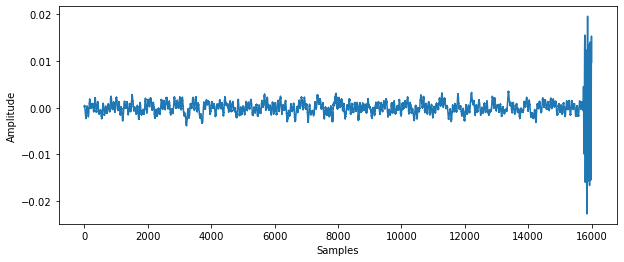

In [3]:
rec_id = raw_dataset.rec_ids[0]
num_samples = raw_dataset.get_record_num_samples(rec_id)
sr = raw_dataset.sample_rate
x, note_infos = raw_dataset.get_record_data(rec_id, 0, sr*1)
print("Record ID:", rec_id)
print("Sampling rate:", sr)
print("Number of samples:", num_samples)
print("Note infos:", str(note_infos)[:400], "...")
print("Number of notes:", len(note_infos))
plot_audio(x)

Took 0.18611788749694824 seconds to load 1 sample


C:\Users\Windows\Desktop\Shahir\music-transcription\noteify\core\utils.py:29: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\Windows\Desktop\Shahir\music-transcription\noteify\core\utils.py:45: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


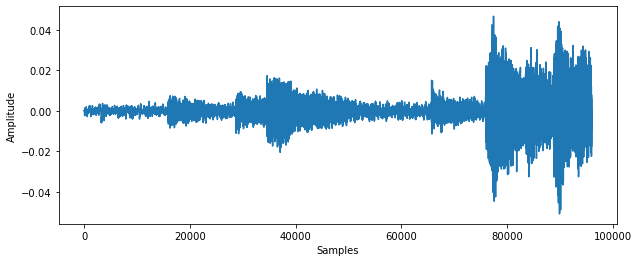

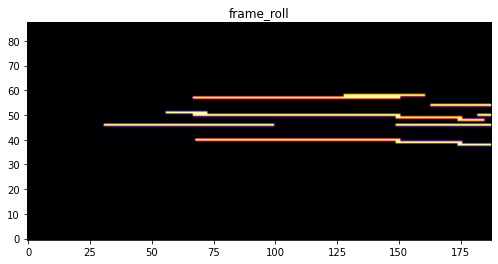

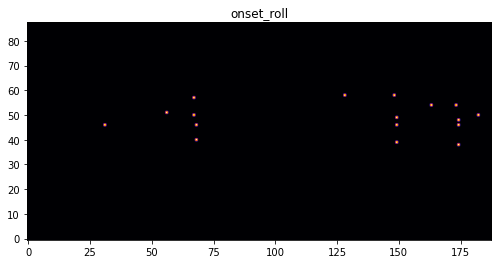

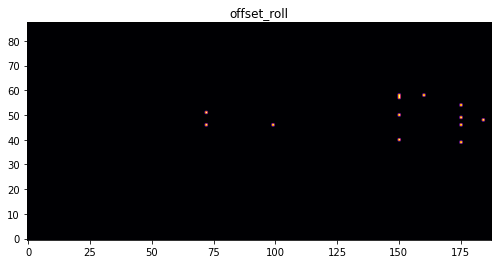

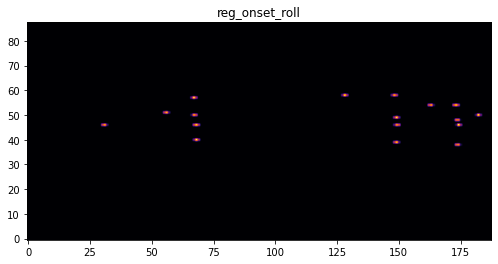

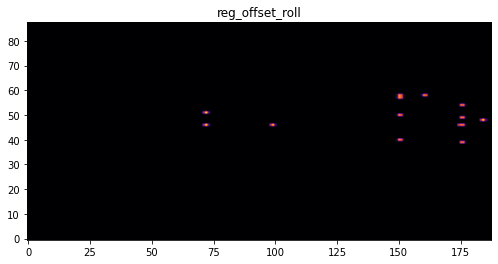

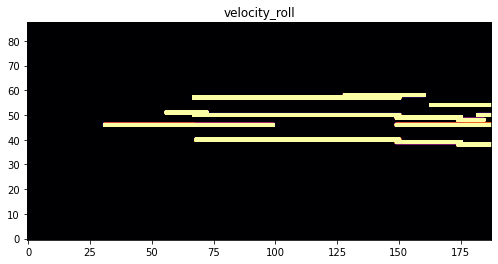

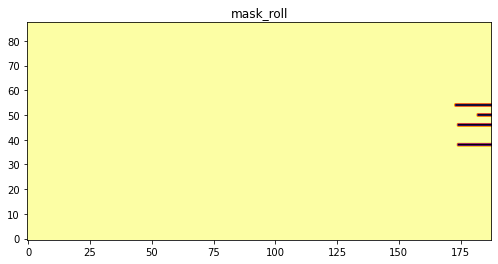

In [4]:
proc_dataset = MaestroDatasetProcessed(raw_dataset, MusicAugmentor())
start_time = time.time()
x, roll_info = proc_dataset[rec_id, 0]
print("Took {} seconds to load 1 sample".format(time.time() - start_time))
plot_audio(x)
plot_roll_info(roll_info)

In [5]:
batch_size = 1
sampler = MusicSegmentSampler(proc_dataset, batch_size)
dataloader = get_music_dataloader(proc_dataset, sampler, num_workers=None)

In [6]:
batch = next(iter(dataloader))
print(batch[0].shape, {k: v.shape for k, v in batch[1].items()})

torch.Size([1, 96000]) {'frame_roll': torch.Size([1, 188, 88]), 'onset_roll': torch.Size([1, 188, 88]), 'offset_roll': torch.Size([1, 188, 88]), 'reg_onset_roll': torch.Size([1, 188, 88]), 'reg_offset_roll': torch.Size([1, 188, 88]), 'velocity_roll': torch.Size([1, 188, 88]), 'mask_roll': torch.Size([1, 188, 88])}


In [ ]:
%qtconsole